# LAB 1

## 1. Prepare environment

In [3]:
#!python -m pip install --upgrade pip
import math
from collections import Callable

from keras.layers import Normalization
!python --version

Python 3.8.8


In [2]:
#!pip install numpy
#!pip install pandas
#!pip install scipy
#!pip install keras
#!pip install setuptools
#!pip install tensorflow
#!pip install tensorflow-datasets
#!pip install tensorflow-hub
#!pip install torch torchvision torchaudio

In [4]:
import scipy
import keras
import setuptools
import torch
from tensorflow.keras.layers import Input, Conv2D, Dense, Activation, Dropout, MaxPooling2D, AveragePooling2D, Flatten, concatenate
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.datasets import cifar10
from sklearn.preprocessing import LabelBinarizer
from random import random
from collections import Callable
from keras import models, layers, optimizers

import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print('Numpy: ' + np.__version__)
print('Pandas: ' + pd.__version__)
print('Scipy: ' + scipy.__version__)
print('Keras: ' + keras.__version__)
print('Setuptools: ' + setuptools.__version__)
print('Tensorflow: ' + tf.__version__)
print('Torch: ' + torch.__version__)

Numpy: 1.20.2
Pandas: 1.2.3
Scipy: 1.4.1
Keras: 2.7.0
Setuptools: 59.2.0
Tensorflow: 2.7.0
Torch: 1.10.0+cu113


# 2. What is Tensor ?

A tensor is a container which can house data in N dimensions, along with its linear operations, though there is nuance
in what tensors technically are and what we refer to as tensors in practice.

Mathematically speaking, tensors are more than simply a data container, however. Aside from holding numeric
data, tensors also include descriptions of the valid linear transformations between tensors. Examples of such
transformations, or relations, include the cross product and the dot product. From a computer science perspective,
it can be helpful to think of tensors as being objects in an object-oriented sense, as opposed to simply being a
data structure.

In [4]:
from IPython.display import Image
Image(url= "https://hadrienj.github.io/assets/images/2.1/scalar-vector-matrix-tensor.png")

Each tensor has some attributes:
- shape: number of elements on each axis
- rank: number of axes: scalar = 0, vector = 1, matrix = 2
- size: number of all elements of tensor

In [5]:
rank_0 = tf.constant(1)
rank_0

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [6]:
rank_1 = tf.constant([1.0, 2.0])
rank_1

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1., 2.], dtype=float32)>

In [7]:
rank_2 = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
rank_2

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 2.],
       [3., 4.],
       [5., 6.]], dtype=float32)>

In [8]:
rank_3 = tf.constant([
  [[0, 1, 2, 3, 4],
   [5, 6, 7, 8, 9]],
  [[10, 11, 12, 13, 14],
   [15, 16, 17, 18, 19]],
  [[20, 21, 22, 23, 24],
   [25, 26, 27, 28, 29]],])
rank_3

<tf.Tensor: shape=(3, 2, 5), dtype=int32, numpy=
array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9]],

       [[10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]],

       [[20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29]]])>

#### There are many ways you might visualize a tensor with more than two axes.

In [9]:
from IPython.display import Image
from IPython.display import display

x = Image(url= "https://www.tensorflow.org/guide/images/tensor/3-axis_numpy.png")
y = Image(url= "https://www.tensorflow.org/guide/images/tensor/3-axis_front.png")
z = Image(url= "https://www.tensorflow.org/guide/images/tensor/3-axis_block.png")
display(x, y, z)

You can convert a tensor to a NumPy array either using np.array or the tensor.numpy method:

In [10]:
np.array(rank_2)

array([[1., 2.],
       [3., 4.],
       [5., 6.]], dtype=float32)

In [11]:
rank_2.numpy()

array([[1., 2.],
       [3., 4.],
       [5., 6.]], dtype=float32)

Tensors often contain floats and ints, but have many other types, including:
- complex numbers
- strings

#### You can do basic math on tensors, including addition, element-wise multiplication, and matrix multiplication.

In [12]:
a = tf.constant([[1, 2],
                 [3, 4]])
b = tf.constant([[1, 1],
                 [1, 1]])

print(tf.add(a, b), "\n")
print(tf.multiply(a, b), "\n")
print(tf.matmul(a, b), "\n")

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[3 3]
 [7 7]], shape=(2, 2), dtype=int32) 



In [13]:
print(a + b, "\n") # element-wise addition
print(a * b, "\n") # element-wise multiplication
print(a @ b, "\n") # matrix multiplication

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[3 3]
 [7 7]], shape=(2, 2), dtype=int32) 



Tensors have shapes. Some vocabulary:

- Shape: The length (number of elements) of each of the axes of a tensor.
- Rank: Number of tensor axes. A scalar has rank 0, a vector has rank 1, a matrix is rank 2.
- Axis or Dimension: A particular dimension of a tensor.
- Size: The total number of items in the tensor, the product shape vector.

In [14]:
rank_4_tensor = tf.zeros([3, 2, 4, 5])
print("Type of every element:", rank_4_tensor.dtype)
print("Number of axes:", rank_4_tensor.ndim)
print("Shape of tensor:", rank_4_tensor.shape)
print("Elements along axis 0 of tensor:", rank_4_tensor.shape[0])
print("Elements along the last axis of tensor:", rank_4_tensor.shape[-1])
print("Total number of elements (3*2*4*5): ", tf.size(rank_4_tensor).numpy())

Type of every element: <dtype: 'float32'>
Number of axes: 4
Shape of tensor: (3, 2, 4, 5)
Elements along axis 0 of tensor: 3
Elements along the last axis of tensor: 5
Total number of elements (3*2*4*5):  120


### Manipulating Shapes

In [15]:
x = tf.constant([[1], [2], [3]])
print(x.shape)

(3, 1)


In [16]:
print(x.shape.as_list())

[3, 1]


You can reshape a tensor into a new shape. The tf.reshape operation is fast and cheap as the underlying data does
not need to be duplicated.

In [17]:
reshaped = tf.reshape(x, [1, 3])
print(x.shape)
print(reshaped.shape)

(3, 1)
(1, 3)


In [19]:
print(tf.reshape(rank_3, [3*2, 5]), "\n")

tf.Tensor(
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]], shape=(6, 5), dtype=int32) 



## 3. Derviatives and gradients in deep learning
### How do we compute derviatives in deep learning?

TensorFlow "records" relevant operations executed inside the context of a tf.GradientTape onto a "tape".
TensorFlow then uses that tape to compute the gradients of a "recorded" computation using reverse mode differentiation.

In [21]:
x = tf.Variable(7.0)
with tf.GradientTape() as tape:
  y = x**2
dy_dx = tape.gradient(y, x)
dy_dx.numpy()

14.000001

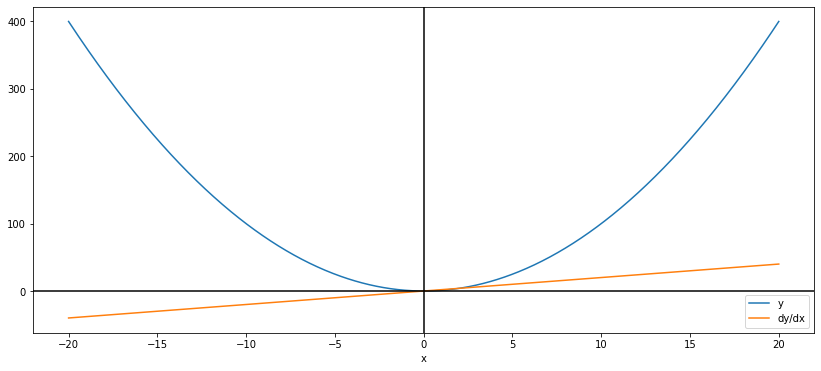

In [22]:
plt.figure(figsize=(14, 6))
x = tf.linspace(-20.0, 20.0, 1000)

with tf.GradientTape() as tape:
  tape.watch(x)
  y = x**2

dy_dx = tape.gradient(y, x)


plt.plot(x, y, label='y')
plt.plot(x, dy_dx, label='dy/dx')
plt.axhline(0, color='black')
plt.axvline(0, color='black')

plt.legend()
_ = plt.xlabel('x')

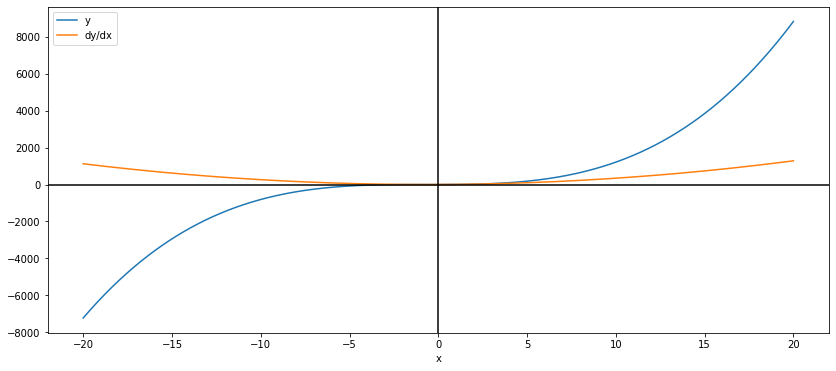

In [23]:
plt.figure(figsize=(14, 6))
x = tf.linspace(-20.0, 20.0, 1000)

with tf.GradientTape() as tape:
  tape.watch(x)
  y = x**3 + (2 * x**2) + x

dy_dx = tape.gradient(y, x)


plt.plot(x, y, label='y')
plt.plot(x, dy_dx, label='dy/dx')
plt.axhline(0, color='black')
plt.axvline(0, color='black')

plt.legend()
_ = plt.xlabel('x')

# 2. Develop a skeleton for a neural learning application in Keras and PyTorch.

### a) Keras template

Epoch 1/5
391/391 [==============================] - 9s 4ms/step - loss: 2.1444 - accuracy: 0.2388

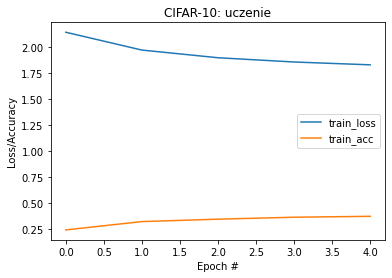

In [24]:
class KerasTemplate:
    """A simple keras deep learning template with sequential API"""

    def __init__(self, epochs: int, batch: int, lr0: float):
        self.epochs = epochs
        self.batch = batch
        self.lr0 = lr0
        self.trainX = []
        self.trainY = []
        self.testX = []
        self.testY = []
        self.classes = 0
        self.model = None
        self.h = None
        self.predictions = []

    def load_data(self, train_x: np.ndarray, train_y: np.ndarray, test_x: np.ndarray, test_y: np.ndarray) -> None:
        lb = LabelBinarizer()
        self.trainY = lb.fit_transform(train_y)
        self.testY = lb.transform(test_y)
        self.trainX = train_x.astype("float32") /255.0
        self.testX = test_x.astype("float32") /255.0
        self.create_model()

    def create_model(self) -> None:
        self.shapeI = self.trainX.shape[1:4]
        self.classes = self.trainY.shape[1]  #ile_klas

        self.model=Sequential()
        self.model.add(Input(shape=self.shapeI))
        self.model.add(Conv2D(32, (3,3), padding="same"))
        self.model.add(Activation('relu'))

        self.model.add(Flatten()) # klasyfikator
        self.model.add(Dense(self.classes))
        self.model.add(Activation('softmax'))  #sigmoid dla dwóch klas
        self.compile()

    def compile(self) -> None:
        opt=SGD(momentum=0.4, learning_rate=self.lr0)
        self.model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    def fit(self) -> None:
        self.h = self.model.fit(self.trainX, self.trainY, batch_size=self.batch, epochs=self.epochs)

    def evaluate(self):
        loss, accuracy = self.model.evaluate(self.testX, self.testY)
        return loss, accuracy

    def predict(self):
        self.predictions = self.model.predict(self.testX)
        return self.predictions

    def print_report(self) -> None:
        n = np.arange(0, self.epochs)
        title="CIFAR-10: uczenie"
        plt.figure()
        plt.plot(n, self.h.history["loss"], label="train_loss")
        plt.plot(n, self.h.history["accuracy"], label="train_acc")
        plt.title(title)
        plt.xlabel("Epoch #")
        plt.ylabel("Loss/Accuracy")
        plt.legend()
        plt.show()
epochS=5
batch=128
lr0=1e-3
(trainX, trainY), (testX, testY)= cifar10.load_data()

kerasTemplate = KerasTemplate(epochS, batch, lr0)
kerasTemplate.load_data(trainX, trainY, testX, testY)
kerasTemplate.fit()
print(kerasTemplate.predict())
kerasTemplate.print_report()

# 3. Perceptron - simplified learning method
### Please model the above problem of binary classification with your own code.
Data (two features):
- from the given example
- generate randomly "more or less" linearly separable areas (use all data for learning)

Initial weights:
- set arbitrarily
- randomly generated

Hyperparameters:
- maximum number of epochs
- eta (= learning rate)

Visualization of data and decision hyperplane after each epoch.

In [25]:
class SimplePerceptron:
    """A simple perceptron"""
    def __init__(self, epochs: int, lr0: float, wages: tf.constant, sigma: float = 0.2):
        self.epochs = epochs
        self.lr0 = lr0
        self.data = []
        self.results = []
        self.wages = wages
        self.sigma = sigma

    def fit(self, data: tf.Tensor, results: tf.Tensor) -> None:
        self.data = data
        self.results = results
        self.learn()

    def learn(self) -> None:
        for epoch in range(1, self.epochs + 1):
            print("Epoch %1d" % epoch)
            to_next_epoch = False
            index = 0
            self.print_info()
            for x1, x2 in self.data:
                x = tf.constant([1.0, x1.numpy(), x2.numpy()])
                calc_result = self.evaluate(self.wages, x)
                if self.verify_classification(calc_result, self.results[index]) == 0:
                    to_next_epoch = True
                    self.modify_wages(x, self.calc_class_value(self.results[index]))
                index = index + 1
            if to_next_epoch is False:
                break

    def verify_classification(self, calc_result: float, real_result: str) -> int:
        return 1 if (real_result == '+' and calc_result >= 0) or (real_result == 'o' and calc_result < 0) else 0

    def modify_wages(self, x: tf.constant, classification_value: float) -> None:
        new_wages = []
        for i in range(0, self.wages.numpy().size):
            new_wages.append(self.modify_wage(self.wages[i].numpy(), x[i].numpy(), classification_value))
        self.wages = tf.convert_to_tensor(new_wages, dtype=tf.float32)


    def modify_wage(self, wi: float, xi: float, classification_value: float) -> float:
        return wi + (self.sigma * classification_value * xi)

    def calc_class_value(self, class_result: str) -> float:
        return 1.0 if class_result == '+' else -1.0

    def evaluate(self, a: tf.constant, b: tf.constant) -> float:
        a = a.numpy()
        b = b.numpy()
        sum = 0
        for i in range(0, a.size):
            sum += a[i] * b[i]
        return sum

    def print_info(self) -> None:
        plt.figure(figsize=(14, 6))
        results = []
        for i in range(-5,6,1):
            results.append(self.perceptron_curve(i))
        plt.plot(range(-5,6,1), results, color='blue', label='perceptron curve')
        index = 0
        for x1, x2 in self.data:
            plt.scatter(x1, x2, marker=self.results[index])
            index = index + 1
        plt.xlim(-7, 7)
        plt.ylim(-7, 7)
        plt.legend()
        plt.grid()
        plt.show()

    def perceptron_curve(self, x) -> float:
        return (-1.0 * (self.wages[1].numpy() / self.wages[2].numpy()) * x) - (self.wages[0].numpy() / self.wages[2].numpy())

## Case a) given data and wages

Epoch 1


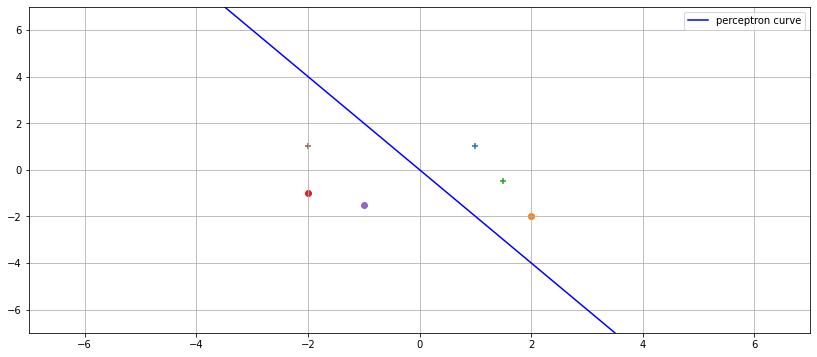

Epoch 2


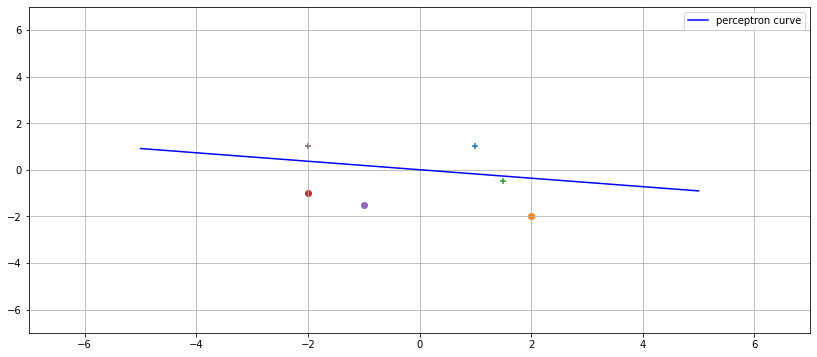

Epoch 3


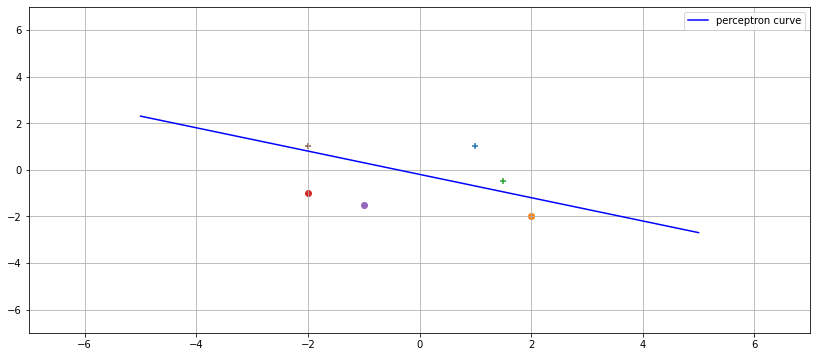

In [26]:
given_data = tf.constant([[1.0, 1.0], [2.0, -2.0], [1.5, -0.5], [-2.0, -1.0], [-1.0, -1.5], [-2.0, 1.0]])
given_result = np.array(['+', 'o', '+', 'o', 'o', '+'])
fixed_wages = tf.constant([0.0, 1.0, 0.5])

simple_perceptron = SimplePerceptron(epochs=5, lr0=0.0, wages=fixed_wages)
simple_perceptron.fit(given_data, given_result)

## Case b) given data and random wages

In [27]:
def generate_random_wages(min_value: float, max_value: float):
    value = random()
    return min_value + (value * (max_value - min_value))

random wages:
tf.Tensor([-2.7114818  3.1945586  3.0975757], shape=(3,), dtype=float32)
Epoch 1


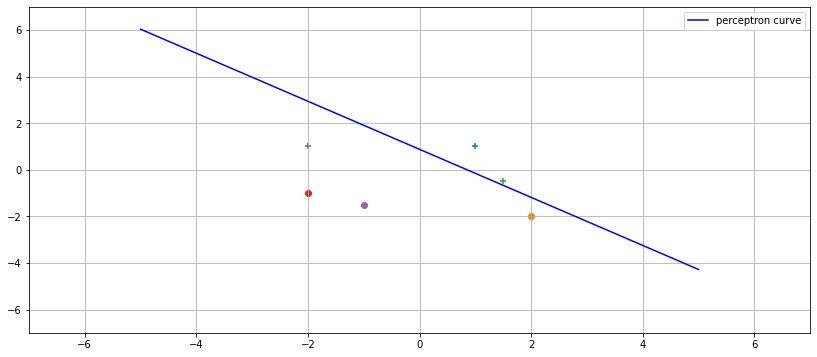

Epoch 2


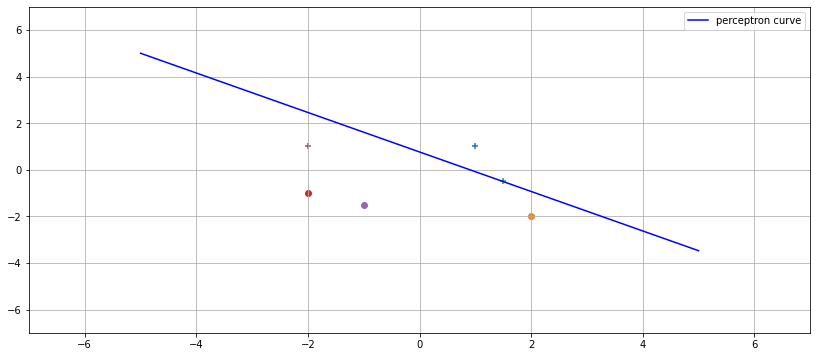

Epoch 3


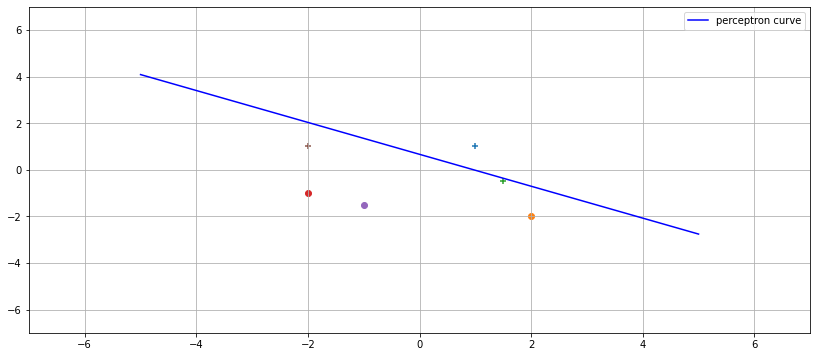

Epoch 4


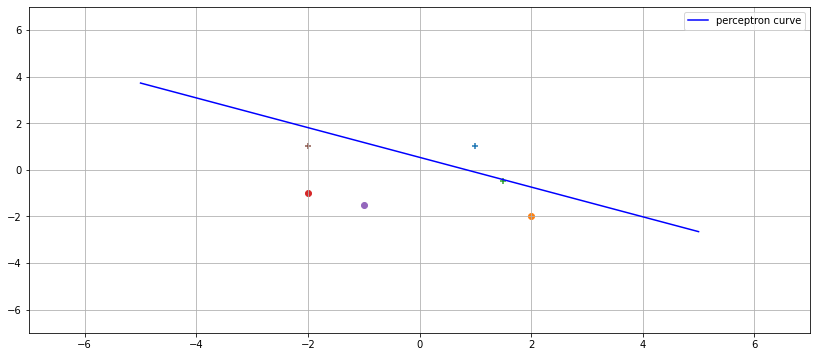

Epoch 5


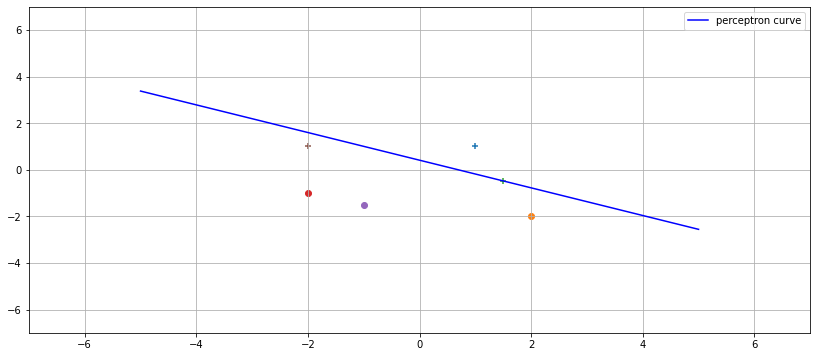

Epoch 6


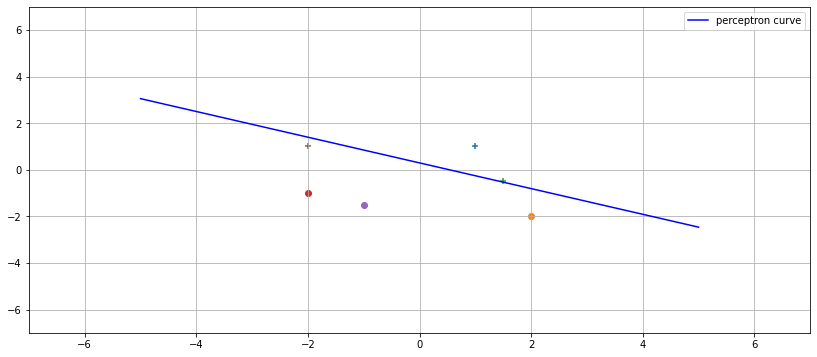

Epoch 7


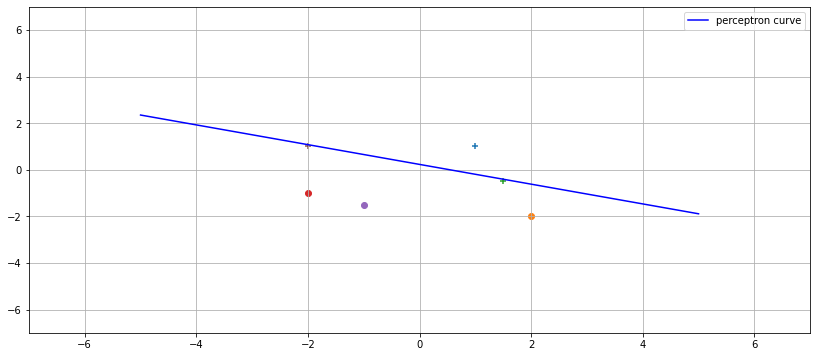

Epoch 8


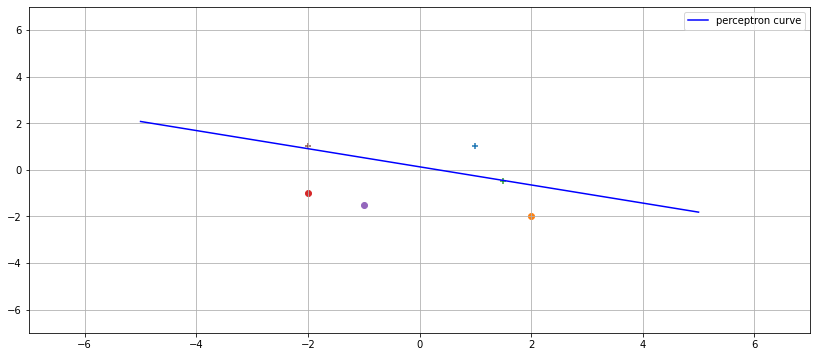

Epoch 9


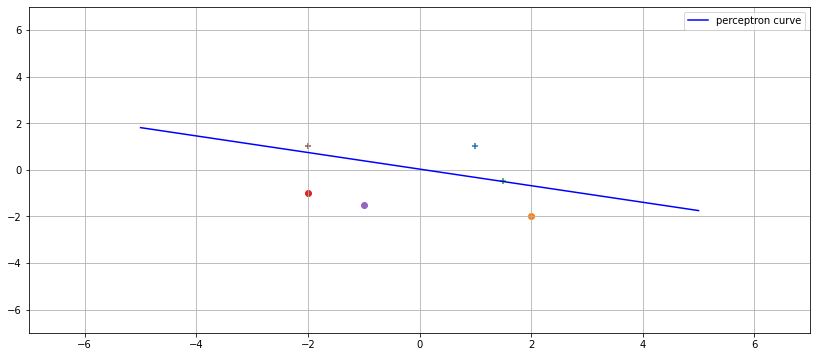

In [28]:
given_data = tf.constant([[1.0, 1.0], [2.0, -2.0], [1.5, -0.5], [-2.0, -1.0], [-1.0, -1.5], [-2.0, 1.0]])
given_result = np.array(['+', 'o', '+', 'o', 'o', '+'])
random_wages = tf.constant([generate_random_wages(-5,5), generate_random_wages(-5,5), generate_random_wages(-5,5)])
print("random wages:")
print(random_wages)
simple_perceptron = SimplePerceptron(epochs=10, lr0=0.0, wages=random_wages)
simple_perceptron.fit(given_data, given_result)

## Case c) random data and fixed wages

In [29]:
def generate_random_data(fc: Callable = lambda x:x, points: int = 10, min_x: float = -5.0, max_x: float = 5.0, min_y: float = -5.0, max_y: float = 5.0):
    generated_points = []
    generated_results = []
    for _ in range(points):
        x1 = generate_random_wages(min_x, max_x)
        x2 = generate_random_wages(min_y, max_y)
        generated_points.append([x1, x2])
        result = '+' if fc(x1) > x2 else 'o'
        generated_results.append(result)
    return tf.convert_to_tensor(generated_points, dtype=tf.float32), generated_results

random data:
tf.Tensor(
[[-3.7810106 -1.0599934]
 [-4.138607  -2.1822016]
 [-2.8994408  2.8704903]
 [ 3.278621   3.5150266]
 [-1.9181764  3.5223746]
 [-2.2042866  0.4975412]
 [-3.144557   1.5963259]
 [ 3.3340344 -2.1824906]
 [ 2.0250423  1.9789599]
 [ 3.8606093  1.173458 ]], shape=(10, 2), dtype=float32)
Epoch 1


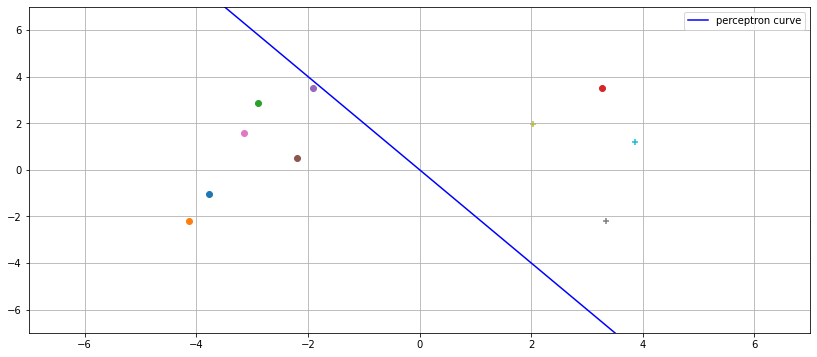

Epoch 2


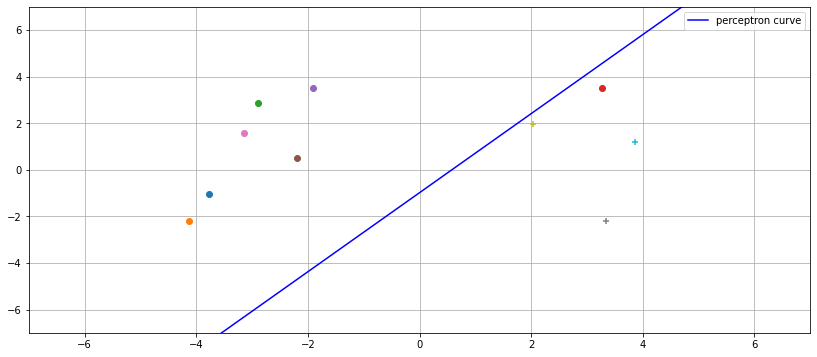

Epoch 3


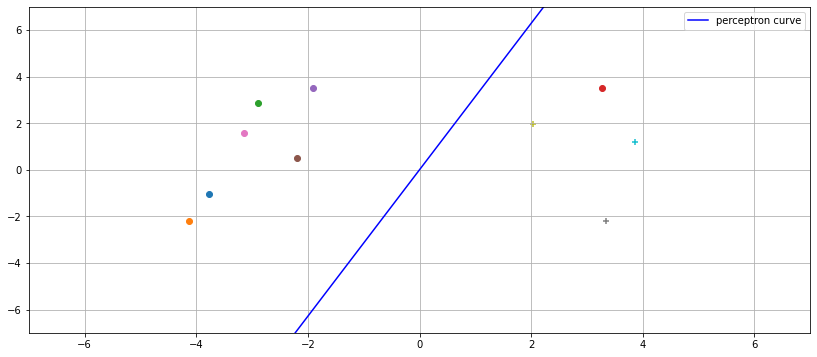

Epoch 4


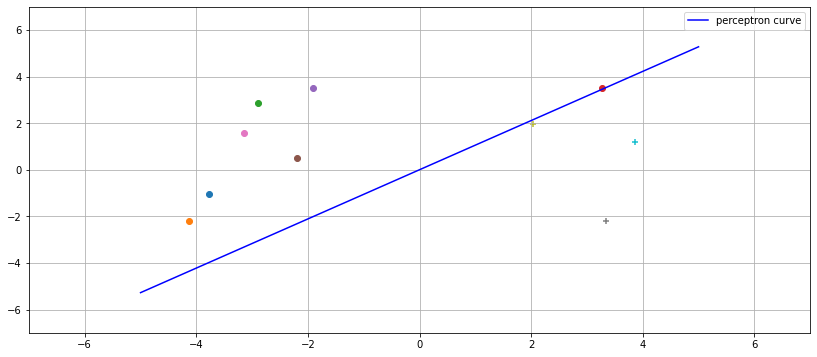

In [30]:
random_data, given_result = generate_random_data()
fixed_wages = tf.constant([0.0, 1.0, 0.5])
print("random data:")
print(random_data)
simple_perceptron = SimplePerceptron(epochs=10, lr0=0.0, wages=fixed_wages)
simple_perceptron.fit(random_data, given_result)

## Case d) random data and wages

random wages:
tf.Tensor([ 2.4091556 -1.8051735  3.772287 ], shape=(3,), dtype=float32)
random data:
tf.Tensor(
[[ 4.4006834  -3.3586175 ]
 [ 0.11951117  3.0522344 ]
 [-4.965306    4.5460734 ]
 [ 4.6334405   4.8249702 ]
 [ 3.141423   -1.31589   ]
 [-0.62187827 -3.4398553 ]
 [ 2.2806158   2.5496192 ]
 [ 4.8720727  -2.3152695 ]
 [-4.0407033   0.48950133]
 [ 1.1347637  -3.0819247 ]], shape=(10, 2), dtype=float32)
Epoch 1


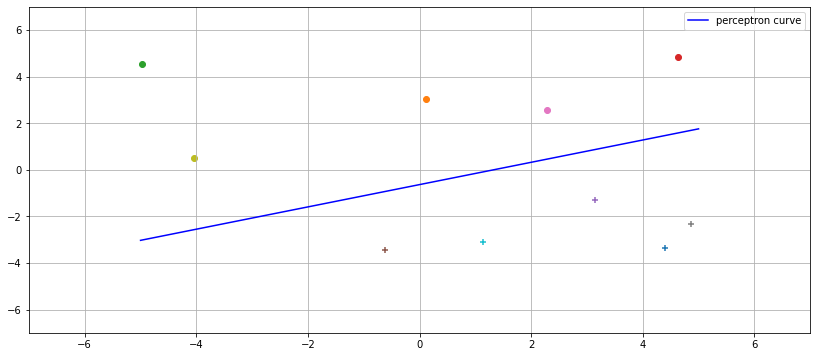

Epoch 2


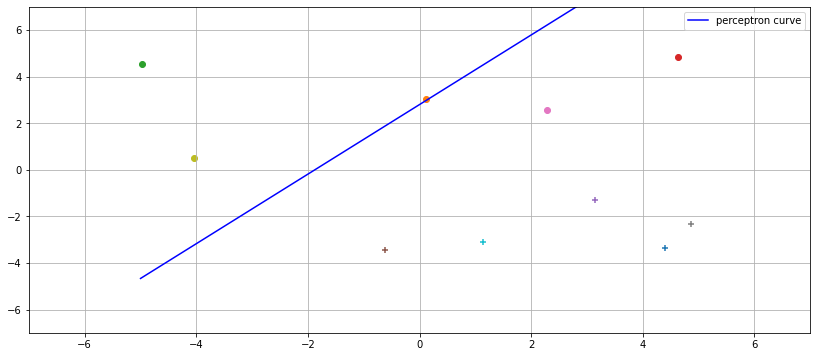

Epoch 3


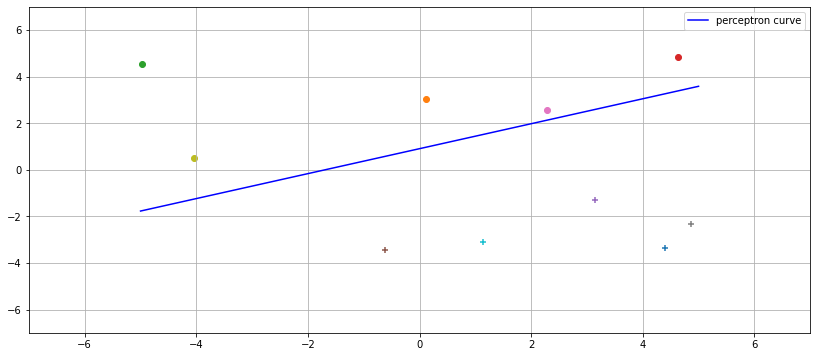

In [31]:
random_data, random_result = generate_random_data()
random_wages = tf.constant([generate_random_wages(-5,5), generate_random_wages(-5,5), generate_random_wages(-5,5)])
print("random wages:")
print(random_wages)
print("random data:")
print(random_data)
simple_perceptron = SimplePerceptron(epochs=10, lr0=0.0, wages=random_wages)
simple_perceptron.fit(random_data, random_result)

# 4.Experiment: model in Keras single perceptron Dense(1, …).
As activation use "hard_sigmoid", which "pretends" to be a perceptrons threshold.

Data (two features):
- from the given example
- generate randomly "more or less" linearly separable areas (use all data for learning)

Wages (layer parameter: kernel_initializer):
- random
- default for layer

Hyperparameters:
- epochs

In [32]:
def generate_random_data_binary(fc: Callable = lambda x:x, points: int = 10, min_x: float = -5.0, max_x: float = 5.0, min_y: float = -5.0, max_y: float = 5.0):
    generated_points = []
    generated_results = []
    for _ in range(points):
        x1 = generate_random_wages(min_x, max_x)
        x2 = generate_random_wages(min_y, max_y)
        generated_points.append([x1, x2])
        result = 1 if fc(x1) > x2 else 0
        generated_results.append(result)
    return tf.convert_to_tensor(generated_points, dtype=tf.float32), tf.convert_to_tensor(generated_results).numpy()

### case a) given data and default weights

In [33]:
given_data = tf.constant([[1.0, 1.0], [2.0, -2.0], [1.5, -0.5], [-2.0, -1.0], [-1.0, -1.5], [-2.0, 1.0]])
given_result = np.array([1, 0, 1, 0, 0, 1])
model = models.Sequential()
print(given_data)
print(given_result)
model.add(keras.Input(shape=(2,), name="x", dtype="float64"))
model.add(layers.Dense(1, input_shape =(None, 2), activation='hard_sigmoid', kernel_initializer='glorot_uniform'))
model.summary()
model.compile(loss='mse', metrics=['accuracy'])
model.fit(given_data, given_result, batch_size=128, epochs=10)
loss, accuracy = model.evaluate(given_data, given_result, batch_size=32)
print("Loss = " + str(loss))
print("Accuracy = " + str(accuracy))
predictions = model.predict(given_data)
print(predictions)

tf.Tensor(
[[ 1.   1. ]
 [ 2.  -2. ]
 [ 1.5 -0.5]
 [-2.  -1. ]
 [-1.  -1.5]
 [-2.   1. ]], shape=(6, 2), dtype=float32)
[1 0 1 0 0 1]
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1/1 [==============================] - 0s 305ms/step - loss: 0.5005 - accuracy: 0.3333
Epoch 2/10
1/1 [==============================] - 0s 3ms/step - loss: 0.4994 - accuracy: 0.3333
Epoch 3/10
1/1 [==============================] - 0s 3ms/step - loss: 0.4986 - accuracy: 0.3333

### case b) random data and default weights

In [34]:
random_data, random_result = generate_random_data_binary(points=6, min_x=-2.0, max_x=2.0, min_y=-2.0, max_y=2.0)
model = models.Sequential()
model.add(keras.Input(shape=(2,), name="x", dtype="float64"))
model.add(layers.Dense(1, input_shape =(None, 2), activation='hard_sigmoid', kernel_initializer='glorot_uniform'))
model.summary()
model.compile(loss='mse', metrics=['accuracy'])
print(random_data)
print(random_result)
model.fit(random_data.numpy(), given_result, batch_size=128, epochs=5)
loss, accuracy = model.evaluate(random_data.numpy(), random_result, batch_size=32)
print("Loss = " + str(loss))
print("Accuracy = " + str(accuracy))
predictions = model.predict(random_data.numpy())
print(predictions)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
tf.Tensor(
[[ 0.21561782 -0.06353115]
 [ 1.4025006  -1.3326317 ]
 [-1.6936786  -0.78116405]
 [ 0.14213865 -0.07531922]
 [ 0.13342892 -1.0337684 ]
 [-0.18264256 -1.6304873 ]], shape=(6, 2), dtype=float32)
[1 1 0 1 1 1]
Epoch 1/5
1/1 [==============================] - 0s 249ms/step - loss: 0.1799 - accuracy: 0.6667
Epoch 2/5
1/1 [==============================] - 0s 5ms/step - loss: 0.1796 - accuracy: 0.6667
Epoch 3/5
1/1 [=============

### case c) given data and random weights

In [35]:
given_data = tf.constant([[1.0, 1.0], [2.0, -2.0], [1.5, -0.5], [-2.0, -1.0], [-1.0, -1.5], [-2.0, 1.0]])
given_result = np.array([1, 0, 1, 0, 0, 1])
initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1.)
model = models.Sequential()
print(given_data)
print(given_result)
model.add(keras.Input(shape=(2,), name="x", dtype="float64"))
model.add(layers.Dense(1, input_shape =(None, 2), activation='hard_sigmoid', kernel_initializer=initializer))
model.summary()
model.compile(loss='mse', metrics=['accuracy'])
model.fit(given_data, given_result, batch_size=128, epochs=5)
loss, accuracy = model.evaluate(given_data, given_result, batch_size=32)
print("Loss = " + str(loss))
print("Accuracy = " + str(accuracy))
predictions = model.predict(given_data)
print(predictions)

tf.Tensor(
[[ 1.   1. ]
 [ 2.  -2. ]
 [ 1.5 -0.5]
 [-2.  -1. ]
 [-1.  -1.5]
 [-2.   1. ]], shape=(6, 2), dtype=float32)
[1 0 1 0 0 1]
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1/1 [==============================] - 0s 220ms/step - loss: 0.3391 - accuracy: 0.6667
Epoch 2/5
1/1 [==============================] - 0s 5ms/step - loss: 0.3379 - accuracy: 0.6667
Epoch 3/5
1/1 [==============================] - 0s 8ms/step - loss: 0.3370 - accuracy: 0.6667

### case d) random data and random weights

In [36]:
random_data, random_result = generate_random_data_binary(points=6, min_x=-2.0, max_x=2.0, min_y=-2.0, max_y=2.0)
initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1.)
model = models.Sequential()
print(random_data)
print(random_result)
model.add(keras.Input(shape=(2,), name="x", dtype="float64"))
model.add(layers.Dense(1, input_shape =(None, 2), activation='hard_sigmoid', kernel_initializer=initializer))
model.summary()
model.compile(loss='mse', metrics=['accuracy'])
model.fit(random_data, random_result, batch_size=128, epochs=5)
loss, accuracy = model.evaluate(random_data, random_result, batch_size=32)
print("Loss = " + str(loss))
print("Accuracy = " + str(accuracy))
predictions = model.predict(random_data)
print(predictions)

tf.Tensor(
[[-0.90675277 -1.2184463 ]
 [-1.7156234  -0.78348637]
 [ 0.65824294  0.36641142]
 [-1.7088276   1.2970587 ]
 [-1.9462972  -0.94076604]
 [ 1.7025743   0.893695  ]], shape=(6, 2), dtype=float32)
[1 0 1 0 0 1]
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1/1 [==============================] - 0s 488ms/step - loss: 0.5266 - accuracy: 0.1667
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 0.5249 - accuracy: 0.1667
Epoch 3/5
1/1 [=============

# 5. For chosen dataset please find correct neural model (depends on data): binary classification/multi-classification, regression).
### Network: plate with Dense() layers.
#### Please choose hyperparameters (hidden layers, number of neurons on each layer, activation) with optimizer, loss function i metric(i).

### My topic: Stroke prediction (url: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset/version/1)

In [65]:
stroke_df = pd.read_csv('healthcare-dataset-stroke-data.csv')
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [66]:
print("Number of cases: " + str(len(stroke_df)))
print("Positive cases: " + str(len(stroke_df[stroke_df['stroke']==1])))
print("Negative cases: " + str(len(stroke_df[stroke_df['stroke']==0])))

Number of cases: 5110
Positive cases: 249
Negative cases: 4861


Let's drop id column

In [67]:
stroke_df.drop('id', inplace=True, axis=1)
stroke_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [167]:
stroke_df = stroke_df.dropna()

Split data for training and validation

In [169]:
val_dataframe = stroke_df.sample(frac=0.2, random_state=1337)
train_dataframe = stroke_df.drop(val_dataframe.index)

print( "Using %d samples for training and %d for validation"% (len(train_dataframe), len(val_dataframe)))

def dataframe_to_dataset(dataframe):
    dataframe = dataframe.copy()
    labels = dataframe.pop("stroke")
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    ds = ds.shuffle(buffer_size=len(dataframe))
    return ds


train_ds = dataframe_to_dataset(train_dataframe)
val_ds = dataframe_to_dataset(val_dataframe)
for x, y in train_ds.take(1):
    print("Input:", x)
    print("Target:", y)

train_ds = train_ds.batch(32)
val_ds = val_ds.batch(32)

Using 3927 samples for training and 982 for validation
Input: {'gender': <tf.Tensor: shape=(), dtype=string, numpy=b'Male'>, 'age': <tf.Tensor: shape=(), dtype=float64, numpy=40.0>, 'hypertension': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'heart_disease': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'ever_married': <tf.Tensor: shape=(), dtype=string, numpy=b'Yes'>, 'work_type': <tf.Tensor: shape=(), dtype=string, numpy=b'Govt_job'>, 'Residence_type': <tf.Tensor: shape=(), dtype=string, numpy=b'Urban'>, 'avg_glucose_level': <tf.Tensor: shape=(), dtype=float64, numpy=82.46>, 'bmi': <tf.Tensor: shape=(), dtype=float64, numpy=25.3>, 'smoking_status': <tf.Tensor: shape=(), dtype=string, numpy=b'smokes'>}
Target: tf.Tensor(0, shape=(), dtype=int64)


Encode data

In [170]:
from keras.layers import IntegerLookup
from keras.layers import Normalization
from keras.layers import StringLookup


def encode_numerical_feature(feature, name, dataset):
    normalizer = Normalization() # normalization layer

    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    normalizer.adapt(feature_ds) # learn the statistics

    encoded_feature = normalizer(feature) # normalize input
    return encoded_feature


def encode_categorical_feature(feature, name, dataset, is_string):
    lookup_class = StringLookup if is_string else IntegerLookup
    lookup = lookup_class(output_mode="binary") # turns string into the intiger

    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    lookup.adapt(feature_ds) # learn the possible strings

    encoded_feature = lookup(feature) # normalize input
    return encoded_feature

Build a model

In [171]:
# Categorical features encoded as integers
hypertension = keras.Input(shape=(1,), name="hypertension", dtype="int64")
heart_disease = keras.Input(shape=(1,), name="heart_disease", dtype="int64")

# Categorical feature encoded as string
gender = keras.Input(shape=(1,), name="gender", dtype="string")
ever_married = keras.Input(shape=(1,), name="ever_married", dtype="string")
work_type = keras.Input(shape=(1,), name="work_type", dtype="string")
residence_type = keras.Input(shape=(1,), name="Residence_type", dtype="string")
smoking_status = keras.Input(shape=(1,), name="smoking_status", dtype="string")

# Numerical features
age = keras.Input(shape=(1,), name="age")
avg_glucose_level = keras.Input(shape=(1,), name="avg_glucose_level")
bmi = keras.Input(shape=(1,), name="bmi")

all_inputs  = [
        hypertension,
        heart_disease,
        gender,
        ever_married,
        work_type,
        residence_type,
        smoking_status,
        age,
        avg_glucose_level,
        bmi
    ]
all_inputs

[<KerasTensor: shape=(None, 1) dtype=int64 (created by layer 'hypertension')>,
 <KerasTensor: shape=(None, 1) dtype=int64 (created by layer 'heart_disease')>,
 <KerasTensor: shape=(None, 1) dtype=string (created by layer 'gender')>,
 <KerasTensor: shape=(None, 1) dtype=string (created by layer 'ever_married')>,
 <KerasTensor: shape=(None, 1) dtype=string (created by layer 'work_type')>,
 <KerasTensor: shape=(None, 1) dtype=string (created by layer 'Residence_type')>,
 <KerasTensor: shape=(None, 1) dtype=string (created by layer 'smoking_status')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'age')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'avg_glucose_level')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'bmi')>]

In [172]:
# Integer categorical features
hypertension_encoded = encode_categorical_feature(hypertension, "hypertension", train_ds, False)
heart_disease_encoded = encode_categorical_feature(heart_disease, "heart_disease", train_ds, False)

# String categorical features
gender_encoded = encode_categorical_feature(gender, "gender", train_ds, True)
ever_married_encoded = encode_categorical_feature(ever_married, "ever_married", train_ds, True)
work_type_encoded = encode_categorical_feature(work_type, "work_type", train_ds, True)
residence_type_encoded = encode_categorical_feature(residence_type, "Residence_type", train_ds, True)
smoking_status_encoded = encode_categorical_feature(smoking_status, "smoking_status", train_ds, True)

# Numerical features
age_encoded = encode_numerical_feature(age, "age", train_ds)
avg_glucose_level_encoded = encode_numerical_feature(avg_glucose_level, "avg_glucose_level", train_ds)
bmi_encoded = encode_numerical_feature(bmi, "bmi", train_ds)

In [174]:
all_features = layers.concatenate(
    [
        hypertension_encoded,
        heart_disease_encoded,
        gender_encoded,
        ever_married_encoded,
        work_type_encoded,
        residence_type_encoded,
        smoking_status_encoded,
        age_encoded,
        avg_glucose_level_encoded,
        bmi_encoded
    ]
)
all_features

<KerasTensor: shape=(None, 30) dtype=float32 (created by layer 'concatenate_4')>

In [186]:
x = layers.Dense(20, activation="relu")(all_features)
output = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(all_inputs, output)
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])

Train a model

In [187]:
model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
123/123 [==============================] - 1s 8ms/step - loss: 0.2410 - accuracy: 0.9503 - val_loss: 0.1665 - val_accuracy: 0.9603

Test a model

In [195]:
sample = {
    "gender": "Male",
    "age": 56,
    "hypertension": 0,
    "heart_disease": 1,
    "ever_married": "Yes",
    "work_type": "Private",
    "Residence_type": "Urban",
    "avg_glucose_level": 130,
    "bmi": 41,
    "smoking_status": "smokes"
}

input_dict = {name: tf.convert_to_tensor([value]) for name, value in sample.items()}
predictions = model.predict(input_dict)
print("This particular patient had a %.1f percent probability of having a stroke." % (100 * predictions[0][0]))

This particular patient had a 13.0 percent probability of having a stroke.
